# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import tweepy
import glob
import numpy as np
import os
import json
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
tweet_url=[' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv']

In [3]:
folder_name = 'tweet_image'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
for url in tweet_url :
    response = requests.get(url)
    with open(os.path.join(folder_name,url.split('/')[-1]),mode="wb") as file :
        file.write(response.content)

In [5]:
images_df = pd.read_csv('image-predictions.tsv',sep='\t')
images_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
394,673612854080196609,https://pbs.twimg.com/media/CVknUTlVEAARjU5.jpg,1,Newfoundland,0.223101,True,Leonberg,0.111106,True,shovel,0.085626,False
1233,746131877086527488,https://pbs.twimg.com/media/ClrK-rGWAAENcAa.jpg,1,chow,0.575637,True,Pomeranian,0.195950,True,Norwich_terrier,0.141224,True
899,699788877217865730,https://pbs.twimg.com/media/CbYmRHyWEAASNzm.jpg,1,Border_terrier,0.355060,True,toy_poodle,0.169736,True,Norwegian_elkhound,0.099884,True
1736,821813639212650496,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
tweets=[]
with open ('tweet-json.txt', 'r') as outfile:
    for line in outfile:
        data =json.loads(line)
        tweets.append({'Tweet_id':data['id'],'Retweets': data['retweet_count'],'Favorites':data['favorite_count']})

In [7]:
tweet_df = pd.DataFrame(tweets, columns = ['Tweet_id','Retweets','Favorites'])

In [8]:
tweet_df.head()

,Tweet_id,Retweets,Favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
sum(df.in_reply_to_status_id.isnull())

2278

In [11]:
df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [12]:
df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [13]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
df.name.value_counts().head(10)

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Lola        10
Tucker      10
Penny       10
Bo           9
Name: name, dtype: int64

In [16]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
df.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/837820167694528512/photo/1,https://twitter.com/dog_rates/status/837820167694528512/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1    2
https://twitter.com/dog_rates/status/866334964761202691/photo/1,https://twitter.com/dog_rates/status/866334964761202691/photo/1                                                                                          

In [19]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
tweet_df.Favorites.value_counts()

0        179
610        3
345        3
2918       3
1691       3
        ... 
33345      1
814        1
23108      1
2630       1
8143       1
Name: Favorites, Length: 2007, dtype: int64

In [21]:
tweet_df.Retweets.value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: Retweets, Length: 1724, dtype: int64

In [22]:
sum(df.retweeted_status_id.isnull())

2175

In [23]:
sum(df.expanded_urls.isnull())

59

In [24]:
sum(df.tweet_id.duplicated())

0

In [25]:
len(df)

2356

In [26]:
df.in_reply_to_status_id.sort_values()

1914    6.658147e+17
2298    6.670655e+17
1339    6.671522e+17
149     6.671522e+17
2169    6.678065e+17
            ...     
2351             NaN
2352             NaN
2353             NaN
2354             NaN
2355             NaN
Name: in_reply_to_status_id, Length: 2356, dtype: float64

In [27]:
sum(images_df.tweet_id.duplicated())

0

In [28]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [29]:
df.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1438,696900204696625153,NaN,NaN,2016-02-09 03:35:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She's a Benebark Cumberpatch. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696900204...,12,10,Rosie,None,None,None,None


In [30]:
images_df.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1827,835297930240217089,https://pbs.twimg.com/media/C5eTCOVUsAAWhvc.jpg,1,Rottweiler,0.341276,True,Border_terrier,0.336220,True,Gordon_setter,0.045448,True
228,670385711116361728,https://pbs.twimg.com/media/CU2wPyWWUAAb1MJ.jpg,1,whippet,0.178027,True,Chesapeake_Bay_retriever,0.105969,True,beagle,0.078720,True
231,670411370698022913,https://pbs.twimg.com/media/CU3HlZtW4AAezbt.jpg,1,Maltese_dog,0.584397,True,miniature_schnauzer,0.064201,True,toy_poodle,0.060868,True


In [31]:
sum(tweet_df.Tweet_id.duplicated())

0

In [32]:
list(tweet_df)

['Tweet_id', 'Retweets', 'Favorites']

### Quality issues

#### df  :

1. Nulls represented as nones in the doggo,floofer,pupper and puppo columns.

2. After melting the four columns we will need to remove dupilcates.

3. then reset the index for the table.

3. convert the timestamp and retweeted_status_timestamp columns data type to datetime data type,

4. change the data type for in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id columns from float to integer.

#### Master_df :

6. remove unwanted columns of the master table.

7. remove the raws that doesnt have jpg_url.(You only want original ratings (no retweets) that have images).

8. Nulls represented as nones, a,an and the in the dog_name columns.

11. remove duplicates.

12. reset index.


### Tidiness issues

1. melt the four columns doggo,floofer,pupper and puppo into one column Type

2. merge the three dataframes.

4. reorder columns in master_df.

5. rename columns in master_df.

6. images_df table: lowercase for p1,p2 and p3 columns. 

7. lowercase prediction column master_df.

8. columns name lowercase master_df.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [33]:
# Make copies of original pieces of data
df_clean = df.copy()
tweet_df_clean = tweet_df.copy()
images_df_clean = images_df.copy()

###### Quality issue #1  :

we better start with tidying issues but we need to melt the four columns first so we have to reconverted the nulls.

#### Define:

Nulls represented as nones in doggo,floofer,pupper and puppo columns.

#### Code

In [34]:
df_clean.doggo = df_clean.doggo.replace('None',np.nan)
df_clean.floofer = df_clean.floofer.replace('None',np.nan)
df_clean.pupper = df_clean.pupper.replace('None',np.nan)
df_clean.puppo = df_clean.puppo.replace('None',np.nan)

#### Test

In [35]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       97 no

### Tidiness Issues

### Issue #1:


#### Define

melt the four columns doggo,floofer,pupper and puppo into one column Type

#### Code

In [37]:
df_clean=pd.melt(df_clean,id_vars=['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name'],value_vars=['doggo','floofer','pupper','puppo'],value_name='Dog_Type')
df_clean = df_clean.drop('variable',axis=1)

#### Test :

In [38]:
df_clean.duplicated().tail(30)

9394    True
9395    True
9396    True
9397    True
9398    True
9399    True
9400    True
9401    True
9402    True
9403    True
9404    True
9405    True
9406    True
9407    True
9408    True
9409    True
9410    True
9411    True
9412    True
9413    True
9414    True
9415    True
9416    True
9417    True
9418    True
9419    True
9420    True
9421    True
9422    True
9423    True
dtype: bool

### Quality Issue #2 :

#### Define :
After melting the fou columns we need to remove the dupilcates


#### Code :

In [39]:
df_clean.drop_duplicates(inplace=True)

#### Test :

In [40]:
sum(df_clean.duplicated())

0

In [41]:
df_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,Dog_Type
2071,671115716440031232,NaN,NaN,2015-11-29 23:57:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Phred. He isn't steering, looking at the ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671115716...,6,10,Phred,NaN
1949,673689733134946305,NaN,NaN,2015-12-07 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're having a blast and remember tomorr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673689733...,11,10,None,NaN
1149,726828223124897792,NaN,NaN,2016-05-01 17:38:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bloop. He's a Phoenician Winnebago. To...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726828223...,12,10,Bloop,NaN
1792,677334615166730240,NaN,NaN,2015-12-17 03:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog gave up mid jump. 9/10 https://t.co/K...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677334615...,9,10,None,NaN
1259,710272297844797440,NaN,NaN,2016-03-17 01:11:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710272297...,11,10,infuriating,NaN
1345,704491224099647488,7.044857e+17,28785486.0,2016-03-01 02:19:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 hero af\n@ABC,NaN,NaN,NaN,NaN,13,10,None,NaN
1995,672594978741354496,NaN,NaN,2015-12-04 01:55:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,NaN
999,748220828303695873,NaN,NaN,2016-06-29 18:25:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Stop what you're doing and watch this heckin m...,NaN,NaN,NaN,https://vine.co/v/iiLjKuYJpr6,13,10,None,NaN
1019,746790600704425984,NaN,NaN,2016-06-25 19:42:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you just can't resist... 10/10 topnotch t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746790600...,10,10,None,NaN
2255,667773195014021121,NaN,NaN,2015-11-20 18:35:10 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a rare Hungarian Pinot named Jessiga. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667773195...,8,10,a,NaN


In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 8151
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2750 non-null   int64  
 1   in_reply_to_status_id       87 non-null     float64
 2   in_reply_to_user_id         87 non-null     float64
 3   timestamp                   2750 non-null   object 
 4   source                      2750 non-null   object 
 5   text                        2750 non-null   object 
 6   retweeted_status_id         219 non-null    float64
 7   retweeted_status_user_id    219 non-null    float64
 8   retweeted_status_timestamp  219 non-null    object 
 9   expanded_urls               2685 non-null   object 
 10  rating_numerator            2750 non-null   int64  
 11  rating_denominator          2750 non-null   int64  
 12  name                        2750 non-null   object 
 13  Dog_Type                    394 n

### Quality Issue #3 :

#### Define :

 restet the index for df_clean

#### Code :

In [43]:
df_clean = df_clean.reset_index(drop=True)

#### Test :

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2750 non-null   int64  
 1   in_reply_to_status_id       87 non-null     float64
 2   in_reply_to_user_id         87 non-null     float64
 3   timestamp                   2750 non-null   object 
 4   source                      2750 non-null   object 
 5   text                        2750 non-null   object 
 6   retweeted_status_id         219 non-null    float64
 7   retweeted_status_user_id    219 non-null    float64
 8   retweeted_status_timestamp  219 non-null    object 
 9   expanded_urls               2685 non-null   object 
 10  rating_numerator            2750 non-null   int64  
 11  rating_denominator          2750 non-null   int64  
 12  name                        2750 non-null   object 
 13  Dog_Type                    394 n

### Tidiness Issue #2 :

#### Define

merge the three dataframes.

#### Code

In [45]:
dfs = pd.merge(tweet_df_clean,df_clean,left_on=['Tweet_id'],right_on=['tweet_id'],how='left')
master_df = pd.merge(dfs,images_df_clean,left_on=['Tweet_id'],right_on=['tweet_id'],how='left')

#### Test

In [46]:
list(master_df)

['Tweet_id',
 'Retweets',
 'Favorites',
 'tweet_id_x',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'Dog_Type',
 'tweet_id_y',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

#### Assesing master_df :

In [47]:
master_df.sample(20)

,Tweet_id,Retweets,Favorites,tweet_id_x,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
585,813130366689148928,513,4968,813130366689148928,8.131273e+17,4.196984e+09,2016-12-25 21:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been informed by multiple sources that th...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320,838952994649550848,4505,21289,838952994649550848,NaN,NaN,2017-03-07 03:22:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2722,666353288456101888,77,229,666353288456101888,NaN,NaN,2015-11-16 20:32:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a mixed Asiago from the Galápagos...,NaN,...,1.0,malamute,0.336874,True,Siberian_husky,0.147655,True,Eskimo_dog,0.093412,True
2214,675534494439489536,470,1953,675534494439489536,NaN,NaN,2015-12-12 04:35:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys?! Only send in dogs. I only rat...,NaN,...,1.0,chow,0.749368,True,schipperke,0.133738,True,Newfoundland,0.049914,True
96,875747767867523072,4497,25773,875747767867523072,NaN,NaN,2017-06-16 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Goose. He's a womanizer. Cheeky as h*c...,NaN,...,1.0,Labrador_retriever,0.799551,True,Chesapeake_Bay_retriever,0.179975,True,vizsla,0.004618,True
846,783466772167098368,2608,9468,783466772167098368,NaN,NaN,2016-10-05 00:40:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He likes eavesdropping from fili...,NaN,...,1.0,Chihuahua,0.789000,True,miniature_pinscher,0.115916,True,toy_terrier,0.036294,True
1794,691675652215414786,577,2116,691675652215414786,NaN,NaN,2016-01-25 17:35:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Richie and Plip. They are the best of ...,NaN,...,1.0,Chihuahua,0.182898,True,teddy,0.128077,False,West_Highland_white_terrier,0.097875,True
173,863062471531167744,2687,8945,863062471531167744,NaN,NaN,2017-05-12 16:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Quinn. She's quite the goofball. ...,NaN,...,2.0,French_bulldog,0.935804,True,pug,0.059576,True,boxer,0.001412,True
873,780601303617732608,3839,13525,780601303617732608,NaN,NaN,2016-09-27 02:53:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hercules. He can have whatever he wants f...,NaN,...,1.0,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
1613,703611486317502464,1709,4229,703611486317502464,NaN,NaN,2016-02-27 16:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scooter. He's experiencing the pupper equ...,NaN,...,1.0,Pembroke,0.756441,True,basenji,0.126621,True,Cardigan,0.080117,True


In [48]:
master_df.head(10)

,Tweet_id,Retweets,Favorites,tweet_id_x,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,8853,39467,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,6514,33819,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,4328,25461,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,8964,42908,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,9774,41048,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,3261,20562,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2158,12041,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,16716,56848,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,4429,28226,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,7711,32467,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [49]:
master_df.Favorites.value_counts()

0        216
10342      5
2706       5
8735       4
1691       4
        ... 
4551       1
459        1
4811       1
8655       1
8143       1
Name: Favorites, Length: 2007, dtype: int64

In [50]:
master_df.jpg_url.sort_values()

2246    https://pbs.twimg.com/ext_tw_video_thumb/67480...
1125    https://pbs.twimg.com/ext_tw_video_thumb/67535...
2225    https://pbs.twimg.com/ext_tw_video_thumb/67535...
2209    https://pbs.twimg.com/ext_tw_video_thumb/67574...
2210    https://pbs.twimg.com/ext_tw_video_thumb/67574...
                              ...                        
2429                                                  NaN
2540                                                  NaN
2580                                                  NaN
2603                                                  NaN
2689                                                  NaN
Name: jpg_url, Length: 2747, dtype: object

In [51]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747 entries, 0 to 2746
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Tweet_id                    2747 non-null   int64  
 1   Retweets                    2747 non-null   int64  
 2   Favorites                   2747 non-null   int64  
 3   tweet_id_x                  2747 non-null   int64  
 4   in_reply_to_status_id       87 non-null     float64
 5   in_reply_to_user_id         87 non-null     float64
 6   timestamp                   2747 non-null   object 
 7   source                      2747 non-null   object 
 8   text                        2747 non-null   object 
 9   retweeted_status_id         216 non-null    float64
 10  retweeted_status_user_id    216 non-null    float64
 11  retweeted_status_timestamp  216 non-null    object 
 12  expanded_urls               2682 non-null   object 
 13  rating_numerator            2747 

In [52]:
sum(master_df.Tweet_id.duplicated())

393

In [53]:
master_df.rating_denominator.value_counts()

10     2724
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [54]:
master_df.rating_denominator.sort_values()

354       0
2726      2
606       7
0        10
1824     10
       ... 
1951    110
2125    120
1950    130
1067    150
1344    170
Name: rating_denominator, Length: 2747, dtype: int64

In [55]:
master_df.rating_denominator.loc[[354]]

354    0
Name: rating_denominator, dtype: int64

### Quality Issue #6 :

#### Define :

remove the unwanted columns of the master table.

#### Code :

In [56]:
master_df.drop(['Retweets','tweet_id_x',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp','name','Dog_Type','tweet_id_y','img_num','p1_dog','p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog'],axis=1,inplace=True)

#### Test :

In [57]:
master_df.head()

,Tweet_id,Favorites,expanded_urls,rating_numerator,rating_denominator,jpg_url,p1,p1_conf
0,892420643555336193,39467,https://twitter.com/dog_rates/status/892420643...,13,10,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049
1,892177421306343426,33819,https://twitter.com/dog_rates/status/892177421...,13,10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,25461,https://twitter.com/dog_rates/status/891815181...,12,10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,42908,https://twitter.com/dog_rates/status/891689557...,13,10,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278
4,891327558926688256,41048,https://twitter.com/dog_rates/status/891327558...,12,10,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


In [58]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747 entries, 0 to 2746
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tweet_id            2747 non-null   int64  
 1   Favorites           2747 non-null   int64  
 2   expanded_urls       2682 non-null   object 
 3   rating_numerator    2747 non-null   int64  
 4   rating_denominator  2747 non-null   int64  
 5   jpg_url             2406 non-null   object 
 6   p1                  2406 non-null   object 
 7   p1_conf             2406 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 225.0+ KB


### Quality Issue #7 :

#### Define :

in the master_df remove the raws that doesnt have jpg_url.(You only want original ratings (no retweets) that have images)

#### Code :

In [59]:
master_df=master_df[master_df.jpg_url.notnull()]

#### Test :

In [60]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406 entries, 0 to 2746
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tweet_id            2406 non-null   int64  
 1   Favorites           2406 non-null   int64  
 2   expanded_urls       2406 non-null   object 
 3   rating_numerator    2406 non-null   int64  
 4   rating_denominator  2406 non-null   int64  
 5   jpg_url             2406 non-null   object 
 6   p1                  2406 non-null   object 
 7   p1_conf             2406 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 141.0+ KB


### Tidiness Issue #3 :

#### Define :
reorder columns in master_df

#### Code :

In [61]:
master_df = master_df[['Tweet_id', 'jpg_url', 'expanded_urls','rating_numerator','rating_denominator','Favorites','p1','p1_conf']]

#### Test :

In [62]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406 entries, 0 to 2746
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tweet_id            2406 non-null   int64  
 1   jpg_url             2406 non-null   object 
 2   expanded_urls       2406 non-null   object 
 3   rating_numerator    2406 non-null   int64  
 4   rating_denominator  2406 non-null   int64  
 5   Favorites           2406 non-null   int64  
 6   p1                  2406 non-null   object 
 7   p1_conf             2406 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 141.0+ KB


### Tidiness Issue #4 :

#### Define :
rename columns in master_df.

#### Code :

In [63]:
master_df = master_df.rename(columns = {'jpg_url':'image_url','expanded_urls':'dog_urls','p1':'prediction','p1_conf':'prediction_confident'})

#### Test :

In [64]:
list(master_df)

['Tweet_id',
 'image_url',
 'dog_urls',
 'rating_numerator',
 'rating_denominator',
 'Favorites',
 'prediction',
 'prediction_confident']

In [65]:
master_df.sample(5)

,Tweet_id,image_url,dog_urls,rating_numerator,rating_denominator,Favorites,prediction,prediction_confident
2082,679475951516934144,https://pbs.twimg.com/media/CW37xZbUoAAUXe5.jpg,https://twitter.com/dog_rates/status/679475951...,9,10,2304,Maltese_dog,0.145742
1060,759099523532779520,https://pbs.twimg.com/media/Cojc_Q0WcAAqi_K.jpg,https://twitter.com/dog_rates/status/759099523...,7,10,16101,Shetland_sheepdog,0.129034
2476,670804601705242624,https://pbs.twimg.com/media/CU8tOJZWUAAlNoF.jpg,https://twitter.com/dog_rates/status/670804601...,10,10,2098,Pomeranian,0.868560
174,862831371563274240,https://pbs.twimg.com/media/C_lkieeVwAAm0L4.jpg,https://twitter.com/dog_rates/status/862831371...,13,10,20011,Australian_terrier,0.207281
2291,674255168825880576,https://pbs.twimg.com/media/CVtvf6bWwAAd1rT.jpg,https://twitter.com/dog_rates/status/674255168...,10,10,1581,Eskimo_dog,0.615741


In [66]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406 entries, 0 to 2746
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tweet_id              2406 non-null   int64  
 1   image_url             2406 non-null   object 
 2   dog_urls              2406 non-null   object 
 3   rating_numerator      2406 non-null   int64  
 4   rating_denominator    2406 non-null   int64  
 5   Favorites             2406 non-null   int64  
 6   prediction            2406 non-null   object 
 7   prediction_confident  2406 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 141.0+ KB


### Tidiness Issue #7 :

#### Define :

master_df columns lowercase.

#### Code :

In [67]:
master_df.columns = map(str.lower, master_df.columns)

#### Test :

In [68]:
master_df.head(2)

,tweet_id,image_url,dog_urls,rating_numerator,rating_denominator,favorites,prediction,prediction_confident
0,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643...,13,10,39467,orange,0.097049
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421...,13,10,33819,Chihuahua,0.323581


## Quality Issues :

### Issue #4 :

#### Define :

convert the timestamp and retweeted_status_timestamp columns data type to datetime data type.


##### Code :

In [69]:
dfs.timestamp = pd.to_datetime(dfs.timestamp)

In [70]:
dfs.retweeted_status_timestamp= pd.to_datetime(dfs.retweeted_status_timestamp)

#### Test :

In [71]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747 entries, 0 to 2746
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   Tweet_id                    2747 non-null   int64              
 1   Retweets                    2747 non-null   int64              
 2   Favorites                   2747 non-null   int64              
 3   tweet_id                    2747 non-null   int64              
 4   in_reply_to_status_id       87 non-null     float64            
 5   in_reply_to_user_id         87 non-null     float64            
 6   timestamp                   2747 non-null   datetime64[ns, UTC]
 7   source                      2747 non-null   object             
 8   text                        2747 non-null   object             
 9   retweeted_status_id         216 non-null    float64            
 10  retweeted_status_user_id    216 non-null    float64         

### Issue #5 :

#### Define :

change the data type for in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id columns from float to integer.

##### Code :

In [72]:
dfs.in_reply_to_status_id= dfs.in_reply_to_status_id.astype("Int64")
dfs.in_reply_to_user_id= dfs.in_reply_to_user_id.astype("Int64")
dfs.retweeted_status_id= dfs.retweeted_status_id.astype("Int64")
dfs.retweeted_status_user_id= dfs.retweeted_status_user_id.astype("Int64")

#### Test :

In [73]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747 entries, 0 to 2746
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   Tweet_id                    2747 non-null   int64              
 1   Retweets                    2747 non-null   int64              
 2   Favorites                   2747 non-null   int64              
 3   tweet_id                    2747 non-null   int64              
 4   in_reply_to_status_id       87 non-null     Int64              
 5   in_reply_to_user_id         87 non-null     Int64              
 6   timestamp                   2747 non-null   datetime64[ns, UTC]
 7   source                      2747 non-null   object             
 8   text                        2747 non-null   object             
 9   retweeted_status_id         216 non-null    Int64              
 10  retweeted_status_user_id    216 non-null    Int64           

### Tidiness Issue #5 :

#### Define :
in images_df table lowercase for p1,p2 and p3 columns.

#### Code :

In [74]:
images_df_clean.p1=images_df_clean.p1.str.lower()
images_df_clean.p2=images_df_clean.p2.str.lower()
images_df_clean.p3=images_df_clean.p3.str.lower()

#### Test :

In [75]:
images_df_clean.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
612,680130881361686529,https://pbs.twimg.com/media/CXBPbVtWAAA2Vus.jpg,1,maltese_dog,0.199121,True,west_highland_white_terrier,0.197897,True,shih-tzu,0.157130,True
229,670403879788544000,https://pbs.twimg.com/media/CU3AxW1WoAA3_35.jpg,1,pug,0.802223,True,french_bulldog,0.172557,True,bull_mastiff,0.007163,True
1212,743210557239623680,https://pbs.twimg.com/media/ClBqDuDWkAALK2e.jpg,1,golden_retriever,0.930705,True,chesapeake_bay_retriever,0.025934,True,labrador_retriever,0.007535,True


In [76]:
images_df_clean.p2.value_counts()

labrador_retriever    104
golden_retriever       92
cardigan               74
chihuahua              44
pomeranian             42
                     ... 
hyena                   1
home_theater            1
promontory              1
cannon                  1
barracouta              1
Name: p2, Length: 404, dtype: int64

### Tidiness Issue 6 :

#### Define :
prediction column lowercase.

#### Code :

In [77]:
master_df.prediction=master_df.prediction.str.lower()

#### Test :

In [78]:
master_df.sample(5)

,tweet_id,image_url,dog_urls,rating_numerator,rating_denominator,favorites,prediction,prediction_confident
2210,675740360753160193,https://pbs.twimg.com/ext_tw_video_thumb/67574...,https://twitter.com/dog_rates/status/675740360...,12,10,1257,golden_retriever,0.800495
962,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,https://twitter.com/dog_rates/status/673320132...,11,10,0,samoyed,0.978833
1027,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,https://twitter.com/dog_rates/status/685325112...,10,10,0,golden_retriever,0.586937
1941,684800227459624960,https://pbs.twimg.com/media/CYDmK7ZVAAI_ylL.jpg,https://twitter.com/dog_rates/status/684800227...,11,10,2979,miniature_schnauzer,0.294457
2561,669351434509529089,https://pbs.twimg.com/media/CUoDk8mWsAAMyBL.jpg,https://twitter.com/dog_rates/status/669351434...,10,10,474,cuirass,0.756829


### Quality Issue 9 :

#### Define :
remove duplicates of master_df.

#### Code :

In [79]:
master_df.drop_duplicates(inplace=True)

#### Test :

In [80]:
sum(master_df.duplicated())

0

### Quality issue 10 :
#### Define :
reset index for master_df.

#### code :

In [81]:
master_df=master_df.reset_index(drop=True)

#### Test :

In [82]:
master_df.loc[13:15]

,tweet_id,image_url,dog_urls,rating_numerator,rating_denominator,favorites,prediction,prediction_confident
13,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,https://twitter.com/dog_rates/status/889638837...,12,10,27672,french_bulldog,0.991650
14,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,https://twitter.com/dog_rates/status/889531135...,13,10,15359,golden_retriever,0.953442
15,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,https://twitter.com/dog_rates/status/889278841...,13,10,25652,whippet,0.626152


In [83]:
master_df.tail(30)

,tweet_id,image_url,dog_urls,rating_numerator,rating_denominator,favorites,prediction,prediction_confident
2043,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,https://twitter.com/dog_rates/status/666411507...,2,10,459,coho,0.404640
2044,666407126856765440,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,https://twitter.com/dog_rates/status/666407126...,7,10,113,black-and-tan_coonhound,0.529139
2045,666396247373291520,https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg,https://twitter.com/dog_rates/status/666396247...,9,10,172,chihuahua,0.978108
2046,666373753744588802,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,https://twitter.com/dog_rates/status/666373753...,11,10,194,soft-coated_wheaten_terrier,0.326467
2047,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,https://twitter.com/dog_rates/status/666362758...,6,10,804,guinea_pig,0.996496
2048,666353288456101888,https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg,https://twitter.com/dog_rates/status/666353288...,8,10,229,malamute,0.336874
2049,666345417576210432,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,https://twitter.com/dog_rates/status/666345417...,10,10,307,golden_retriever,0.858744
2050,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,https://twitter.com/dog_rates/status/666337882...,9,10,204,ox,0.416669
2051,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,https://twitter.com/dog_rates/status/666293911...,3,10,522,three-toed_sloth,0.914671
2052,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,https://twitter.com/dog_rates/status/666287406...,1,2,152,maltese_dog,0.857531


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [84]:
twitter_archive_master = master_df.to_csv('twitter_archive_master.csv',index= False)

In [85]:
master_df_saved = pd.read_csv('twitter_archive_master.csv')

In [86]:
master_df_saved.head()

,tweet_id,image_url,dog_urls,rating_numerator,rating_denominator,favorites,prediction,prediction_confident
0,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643...,13,10,39467,orange,0.097049
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421...,13,10,33819,chihuahua,0.323581
2,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://twitter.com/dog_rates/status/891815181...,12,10,25461,chihuahua,0.716012
3,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://twitter.com/dog_rates/status/891689557...,13,10,42908,paper_towel,0.170278
4,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,https://twitter.com/dog_rates/status/891327558...,12,10,41048,basset,0.555712


In [87]:
master_df.head()

,tweet_id,image_url,dog_urls,rating_numerator,rating_denominator,favorites,prediction,prediction_confident
0,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643...,13,10,39467,orange,0.097049
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421...,13,10,33819,chihuahua,0.323581
2,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://twitter.com/dog_rates/status/891815181...,12,10,25461,chihuahua,0.716012
3,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://twitter.com/dog_rates/status/891689557...,13,10,42908,paper_towel,0.170278
4,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,https://twitter.com/dog_rates/status/891327558...,12,10,41048,basset,0.555712


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insight #1 :

#### Code :

In [88]:
master_df.prediction.value_counts().head(10)

golden_retriever      150
labrador_retriever    100
pembroke               88
chihuahua              83
pug                    57
chow                   44
samoyed                43
toy_poodle             39
pomeranian             38
cocker_spaniel         30
Name: prediction, dtype: int64

In [89]:
top_pred = ['golden_retriever','labrador_retriever','pembroke','chihuahua']
predm_df = master_df[master_df['prediction'].isin(top_pred)]
predm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 1 to 2062
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              421 non-null    int64  
 1   image_url             421 non-null    object 
 2   dog_urls              421 non-null    object 
 3   rating_numerator      421 non-null    int64  
 4   rating_denominator    421 non-null    int64  
 5   favorites             421 non-null    int64  
 6   prediction            421 non-null    object 
 7   prediction_confident  421 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 24.7+ KB


In [90]:
best_confident = predm_df.groupby('prediction').mean()['prediction_confident']
best_confident.sort_values()

prediction
chihuahua             0.586888
labrador_retriever    0.666523
pembroke              0.717223
golden_retriever      0.723555
Name: prediction_confident, dtype: float64

### Insight #2 :

#### Code :

In [91]:
# creating a dataframe that only contains rating_denominator equal 10.

denom10 = master_df['rating_denominator']==10
denom10_df = master_df[denom10]

In [92]:
# to get the most popular three type of dogs.
denom10_df.prediction.value_counts().head(10)

golden_retriever      146
labrador_retriever     97
pembroke               88
chihuahua              83
pug                    57
chow                   44
samoyed                43
toy_poodle             39
pomeranian             38
malamute               30
Name: prediction, dtype: int64

In [93]:
# crrating a dataframe that only contains the three most popular with rating_denominator of 10.
top_pred = ['golden_retriever','labrador_retriever','pembroke']
pred_df = denom10_df[denom10_df['prediction'].isin(top_pred)]
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 9 to 2062
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              331 non-null    int64  
 1   image_url             331 non-null    object 
 2   dog_urls              331 non-null    object 
 3   rating_numerator      331 non-null    int64  
 4   rating_denominator    331 non-null    int64  
 5   favorites             331 non-null    int64  
 6   prediction            331 non-null    object 
 7   prediction_confident  331 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 19.4+ KB


In [94]:
import statsmodels.api as sm

# making multipule linear regression model 
dummies = pd.get_dummies(pred_df['prediction'])
new_pred_df = pred_df.join(dummies)
new_pred_df['intercept']=1
new_pred_df.head()

,tweet_id,image_url,dog_urls,rating_numerator,rating_denominator,favorites,prediction,prediction_confident,golden_retriever,labrador_retriever,pembroke,intercept
9,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,https://twitter.com/dog_rates/status/890240255...,14,10,32467,pembroke,0.511319,0,0,1,1
12,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,https://twitter.com/dog_rates/status/889665388...,13,10,38818,pembroke,0.966327,0,0,1,1
14,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,https://twitter.com/dog_rates/status/889531135...,13,10,15359,golden_retriever,0.953442,1,0,0,1
16,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,https://twitter.com/dog_rates/status/888917238...,12,10,29611,golden_retriever,0.714719,1,0,0,1
17,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,https://twitter.com/dog_rates/status/888804989...,13,10,26080,golden_retriever,0.469760,1,0,0,1


In [95]:
lm = sm.OLS(new_pred_df['rating_numerator'],new_pred_df[['intercept','labrador_retriever','golden_retriever']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       rating_numerator   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.815
Date:                Tue, 21 Sep 2021   Prob (F-statistic):             0.0614
Time:                        14:38:17   Log-Likelihood:                -586.04
No. Observations:                 331   AIC:                             1178.
Df Residuals:                     328   BIC:                             1189.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             11.4432      0.152     75.184      0.000      11.144      11.743
labrador_retriever    -0.3092      0.210     -1.471      0.142      -0.723       0.104
golden_retriever       0.1322      0.193      0.686      0.493      -0.247       0.511
==============================================================================
Omnibus:                      111.863   Durbin-Watson:                   1.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              397.050
Skew:                          -1.464   Prob(JB):                     6.05e-87
Kurtosis:                       7.497   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Insight #3

#### Code :

In [96]:
#making a linear regression to see the relationsheip between favorites and rating_numerator for the tweets that have rating_denominator of 10
denom10_df['intercept']=1

<ipython-input-96-2bb6f9c7d932>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  denom10_df['intercept']=1


In [97]:
lm=sm.OLS(denom10_df['favorites'],denom10_df[['intercept','rating_numerator']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              favorites   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5038
Date:                Tue, 21 Sep 2021   Prob (F-statistic):              0.478
Time:                        14:38:18   Log-Likelihood:                -22240.
No. Observations:                2055   AIC:                         4.448e+04
Df Residuals:                    2053   BIC:                         4.449e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept         8522.5673    278.878     30.560      0.000    7975.655    9069.480
rating_numerator     4.7441      6.684      0.710      0.478      -8.363      17.852
==============================================================================
Omnibus:                     1671.609   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46369.150
Skew:                           3.691   Prob(JB):                         0.00
Kurtosis:                      25.069   Cond. No.                         43.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Insights:

1. the prediction model has been most confidene in predicting golden_retriever by 0.72 confident ratio 

2. the multipule linear regression predictes that the numerator rate for pembroke is 11.53 and the predicted numerator rate for the labrador retriever is less than pembroke's rate by 0.3504 and for golden retriever is higher by 0.0910.

3.  from the linear model we predict that for each number increase in the rating_numerator the favorites number would increase by 5.7

### Visualization

In [98]:
top_ten = ['golden_retriever','labrador_retriever','pembroke','chihuahua','pug','chow','samoyed','toy_poodle','pomeranian','cocker_spaniel']
ten_df = denom10_df[denom10_df['prediction'].isin(top_ten)]
ten_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 1 to 2065
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              665 non-null    int64  
 1   image_url             665 non-null    object 
 2   dog_urls              665 non-null    object 
 3   rating_numerator      665 non-null    int64  
 4   rating_denominator    665 non-null    int64  
 5   favorites             665 non-null    int64  
 6   prediction            665 non-null    object 
 7   prediction_confident  665 non-null    float64
 8   intercept             665 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 44.2+ KB


In [99]:
#take 30 sample of each breed
ten_of = ten_df.groupby('prediction').apply(lambda s: s.sample(30))
ten_new = ten_of.reset_index(drop=True)

In [100]:
ten_new.groupby('prediction').mean()['rating_numerator'].sort_values().tail(10)

prediction
pug                   10.366667
chihuahua             10.733333
toy_poodle            11.066667
labrador_retriever    11.200000
cocker_spaniel        11.400000
pembroke              11.400000
golden_retriever      11.666667
samoyed               11.733333
chow                  11.766667
pomeranian            13.366667
Name: rating_numerator, dtype: float64

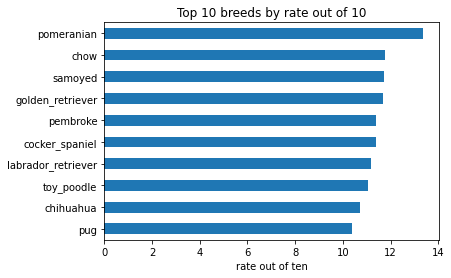

In [101]:
def display_barh(df, title, xlabel):
    ax = df.plot(kind='barh')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(None)

display_barh(ten_new.groupby('prediction').mean()['rating_numerator'].sort_values().tail(10),'Top 10 breeds by rate out of 10', 'rate out of ten')